In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Exercício 2

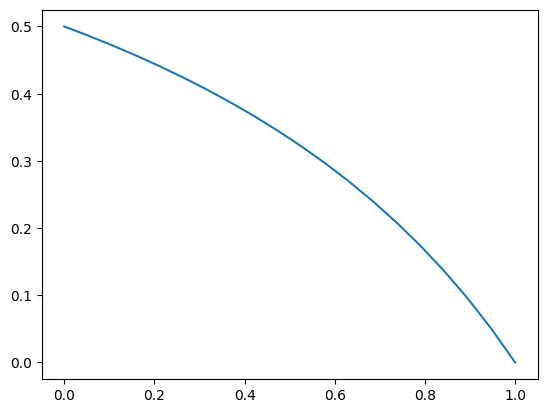

In [31]:


N=16 # Dimensão
alphastar=[] #Array de soluções
B=np.linspace(0,1,20) #Array de beta


b=cp.Parameter(nonneg=True)
alpha= cp.Variable(nonneg=True)

c1=np.ones((1,N))



# Matriz inicial contendo apenas a soma dos p(a0,a1,b0,b1) correspondentes a diferentes p(a,b|x,y)
M=np.zeros((N,N))
M[0][0],M[0][1],M[0][4],M[0][5] = 1,1,1,1
M[1][8],M[1][12],M[1][9],M[1][13] = 1,1,1,1 #
M[2][2],M[2][6],M[2][3],M[2][7] = 1,1,1,1 #
M[3][10],M[3][14],M[3][11],M[3][15] = 1,1,1,1 #
M[4][0],M[4][8],M[4][1],M[4][9] = 1,1,1,1 #
M[5][4],M[5][12],M[5][5],M[5][13] = 1,1,1,1 #
M[6][2],M[6][10],M[6][3],M[6][11] = 1,1,1,1 #
M[7][6],M[7][14],M[7][7],M[7][15] = 1,1,1,1 #
M[8][0],M[8][4],M[8][2],M[8][6] = 1,1,1,1 #
M[9][8],M[9][10],M[9][12],M[9][14] = 1,1,1,1 #
M[10][1],M[10][3],M[10][5],M[10][7] = 1,1,1,1 #
M[11][9],M[11][11],M[11][13],M[11][15] = 1,1,1,1  #
M[12][0],M[12][8],M[12][2],M[12][10] = 1,1,1,1 #
M[13][4],M[13][6],M[13][12],M[13][14] = 1,1,1,1 #
M[14][1],M[14][9],M[14][3],M[14][11] = 1,1,1,1  #
M[15][5],M[15][13],M[15][7],M[15][15] = 1,1,1,1 #


#Reoordenamento da matriz para corresponder a posição de p(ab|xy) corretamente
A=np.zeros((16,16))
position_list=(0,8,4,12,2,10,6,14,1,9,5,13,3,11,7,15)
for i in range(16):
  j=position_list[i]
  A[j]=M[i]

#Definição dos vetores
p_I = np.full((16,1),1/4)
p_L=np.zeros((16,1))
p_PR=np.zeros((16,1))
p_L[0],p_L[1],p_L[2],p_L[3] = 1,1,1,1
p_PR[0],p_PR[1],p_PR[2],p_PR[7],p_PR[11],p_PR[12],p_PR[13],p_PR[14] = .5,.5,.5,.5,.5,.5,.5,.5


#Loop de Minimização

for h in B:
  b.value=h
  p = cp.Variable(shape=(16,1), nonneg=True)
  p_ab = alpha*p_PR + (1-alpha)*(b*p_L + (1-b)*p_I)
  normal=cp.matmul(c1,p)
  restrictions=[]
  restrictions.append(alpha<=1)
  restrictions.append(normal==1)
  restrictions.append(cp.matmul(A,p) == p_ab)
  prob = cp.Problem(cp.Maximize(alpha),
                restrictions)
  prob.solve()
  alphastar.append(alpha.value)
plt.plot(B,alphastar)


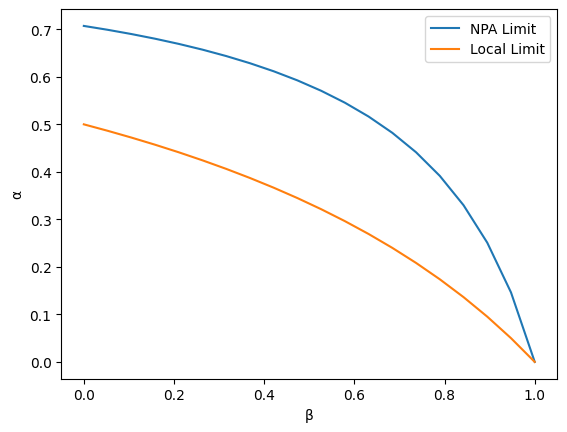

In [45]:
x = cp.Variable()
y = cp.Variable()
alphastar2=[]
for h in B:
  b.value=h
  #p = cp.Variable(shape=(16,1), nonneg=True)
  p = alpha*p_PR + (1-alpha)*(b*p_L + (1-b)*p_I)
  pa00 = p[0] + p[4]
  pa01 = p[2]+ p[6]
  pb00 = p[0] + p[8]
  pb01 = p[1] + p[9]

  Gamma = cp.bmat([
          [1,pa00,pa01,pb00,pb01],
          [pa00,pa00,x,p[0],p[1]],
          [pa01,x,pa01,p[2],p[3]],
          [pb00,p[0],p[2],pb00,y],
          [pb01,p[1],p[3],y,pb01]])
  restrictions=[]
  restrictions.append(alpha<=1)
  restrictions.append(Gamma>>0)
  prob = cp.Problem(cp.Maximize(alpha),
                restrictions)
  prob.solve()
  alphastar2.append(alpha.value)
plt.plot(B,alphastar2,label='NPA Limit')
plt.plot(B,alphastar,label='Local Limit')
plt.xlabel("β")
plt.ylabel("α")
plt.legend()
plt.savefig('grafQ2.png')